In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.layers import*

Using TensorFlow backend.


In [3]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from keras.optimizers import Adam

In [6]:
(X_Train,_), (_,_) = mnist.load_data()

In [7]:
print(X_Train.shape)

(60000, 28, 28)


In [8]:
### normalize the data
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(X_Train.min(), X_Train.max())

-1.0 1.0


In [9]:
### flatten the data
X_Train = X_Train.reshape(-1, 28*28)
print(X_Train.shape)

(60000, 784)


In [10]:
EPOCHS = 100
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
adam = Adam(lr = 2e-4, beta_1=0.5)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
### generator

generator = Sequential()
generator.add(Dense(256, input_shape = (NOISE_DIM, )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))


In [12]:
generator.compile(loss = 'binary_crossentropy', optimizer = adam)

In [13]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [14]:
### discriminator

discriminator = Sequential()
discriminator.add(Dense(512, input_shape = (784, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam)

In [15]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [16]:
### combined model (Generator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape = (NOISE_DIM, ))
generator_output = generator(gan_input)

gan_output = discriminator(generator_output)

model = Model(gan_input, gan_output)

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [19]:
!mkdir images
!mkdir models

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘models’: File exists


In [20]:
def showImage(epoch):
  noise = noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(-1, 28, 28)
  
  plt.figure(figsize=(10, 10))
  for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(generated_imgs[i], cmap = 'gray', interpolation = 'nearest')
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.savefig('images/gan_output{0}.png'.format(epoch + 1))
  

Instructions for updating:
Use tf.cast instead.
Epochs 1 D loss 153.2292 G loss 226.7152


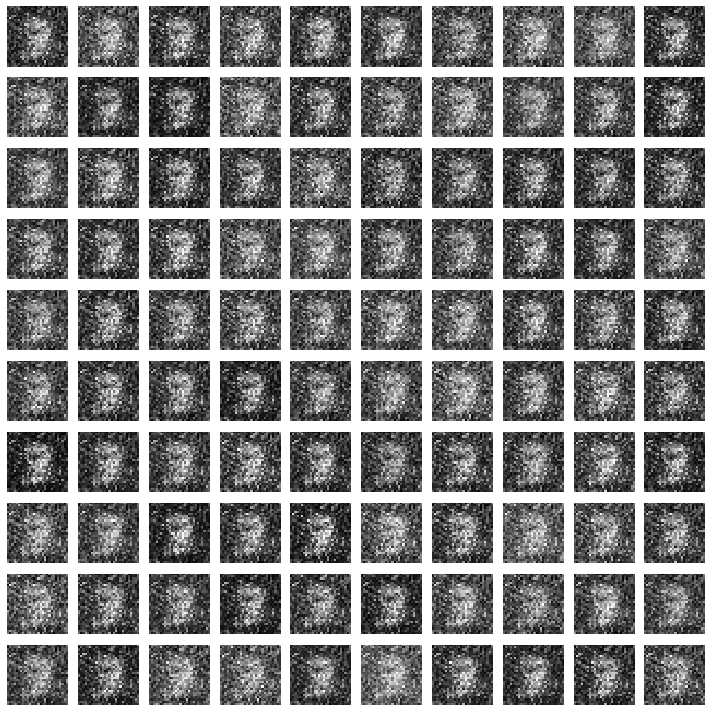

Epochs 2 D loss 151.5386 G loss 237.8584
Epochs 3 D loss 150.4732 G loss 247.5905
Epochs 4 D loss 145.3321 G loss 263.3090
Epochs 5 D loss 139.4688 G loss 282.1570
Epochs 6 D loss 136.9908 G loss 294.4815


<Figure size 432x288 with 0 Axes>

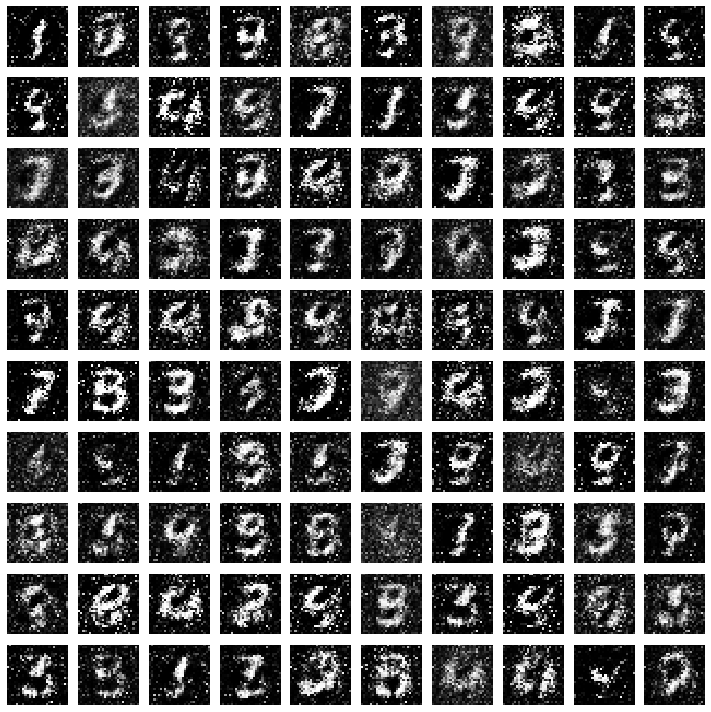

Epochs 7 D loss 133.1441 G loss 311.8107
Epochs 8 D loss 139.5847 G loss 284.6531
Epochs 9 D loss 140.9991 G loss 274.7909
Epochs 10 D loss 143.0740 G loss 269.0775
Epochs 11 D loss 148.1486 G loss 252.3962


<Figure size 432x288 with 0 Axes>

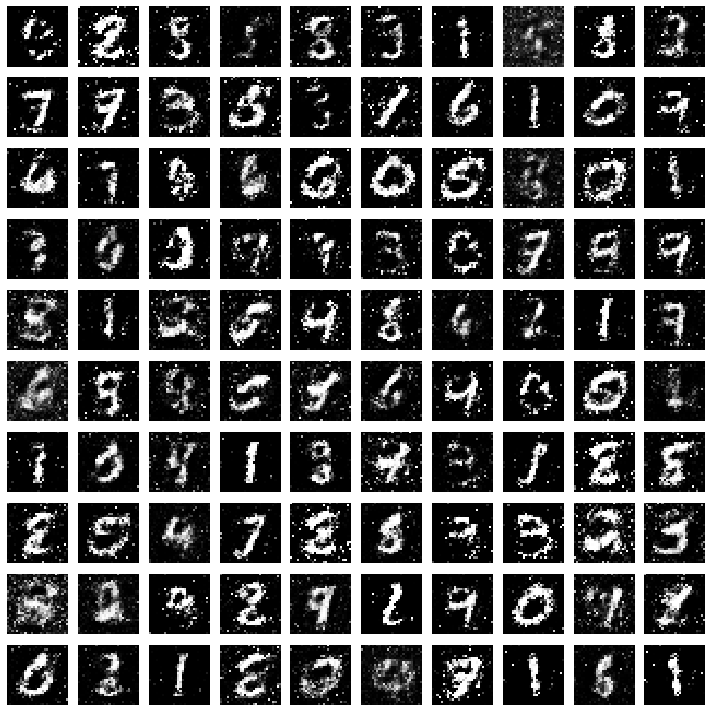

Epochs 12 D loss 149.6397 G loss 245.7207
Epochs 13 D loss 149.0869 G loss 245.7467
Epochs 14 D loss 150.2410 G loss 241.3302
Epochs 15 D loss 150.6908 G loss 241.6751
Epochs 16 D loss 151.0070 G loss 242.3025


<Figure size 432x288 with 0 Axes>

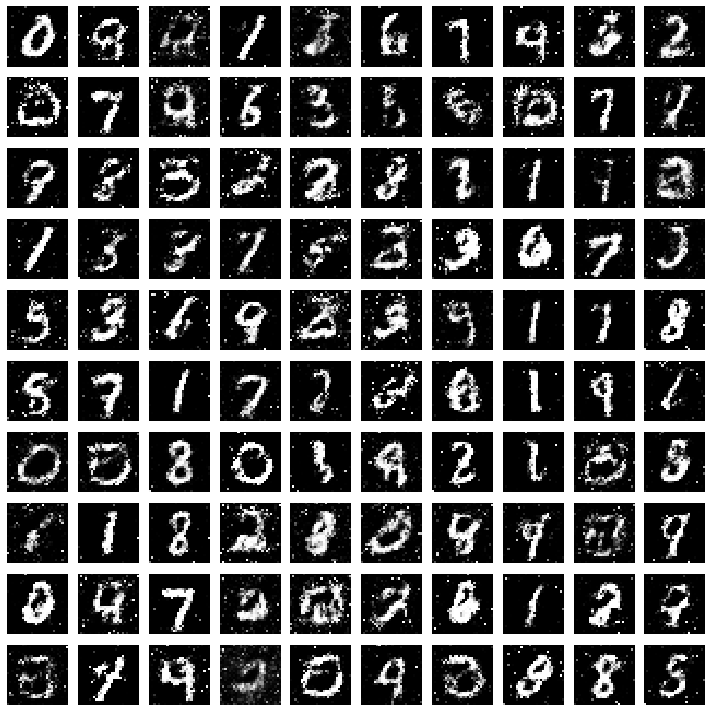

Epochs 17 D loss 151.2963 G loss 239.8497
Epochs 18 D loss 151.2965 G loss 238.9735
Epochs 19 D loss 151.4555 G loss 239.2478
Epochs 20 D loss 152.7700 G loss 237.3113
Epochs 21 D loss 153.0413 G loss 235.0019


<Figure size 432x288 with 0 Axes>

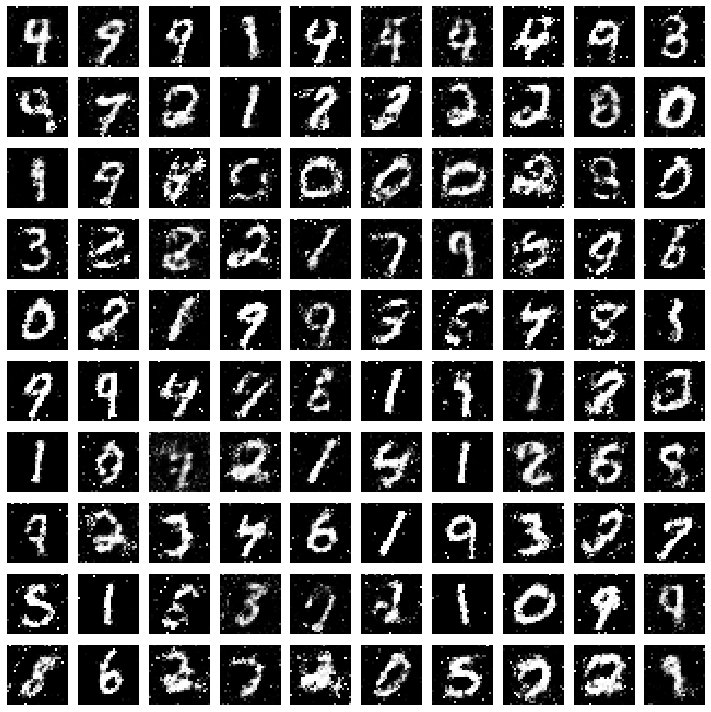

Epochs 22 D loss 153.1052 G loss 235.1761
Epochs 23 D loss 153.0840 G loss 236.3631
Epochs 24 D loss 154.1591 G loss 234.0120
Epochs 25 D loss 154.7377 G loss 233.7759
Epochs 26 D loss 154.8463 G loss 229.7182


<Figure size 432x288 with 0 Axes>

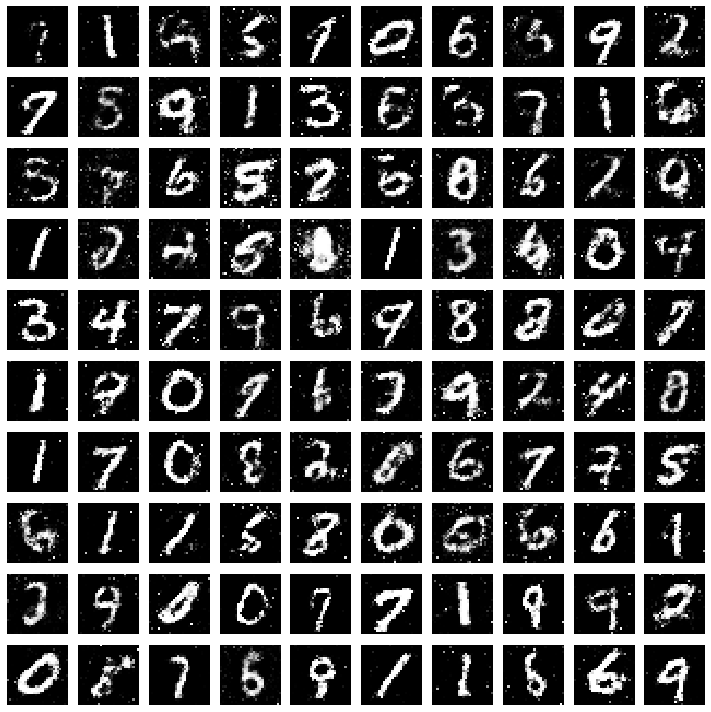

Epochs 27 D loss 155.1441 G loss 231.6615
Epochs 28 D loss 154.6372 G loss 232.1810
Epochs 29 D loss 155.4780 G loss 230.7401
Epochs 30 D loss 155.4434 G loss 230.3758
Epochs 31 D loss 155.7344 G loss 230.9776


<Figure size 432x288 with 0 Axes>

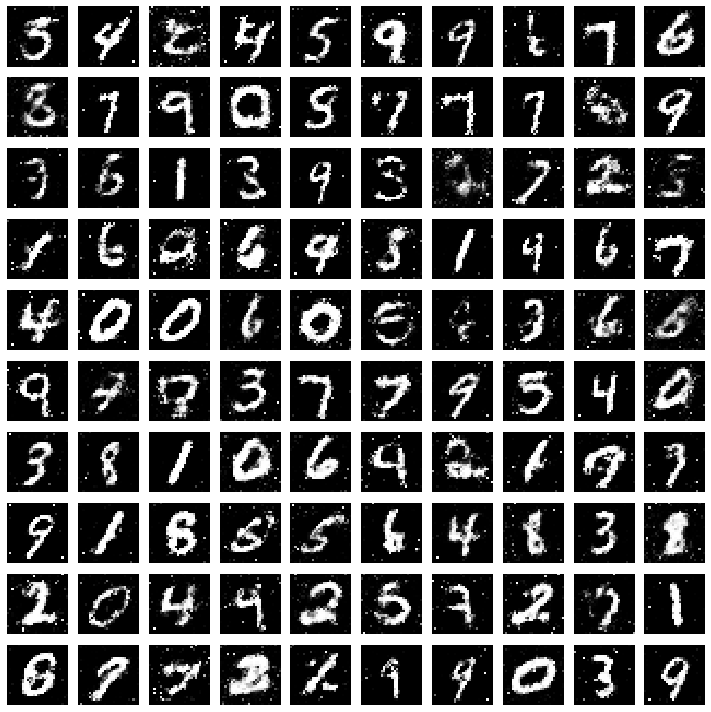

Epochs 32 D loss 155.5330 G loss 229.2367
Epochs 33 D loss 155.1020 G loss 231.5408
Epochs 34 D loss 155.3838 G loss 230.1501
Epochs 35 D loss 155.7045 G loss 229.5754
Epochs 36 D loss 155.7644 G loss 228.7974


<Figure size 432x288 with 0 Axes>

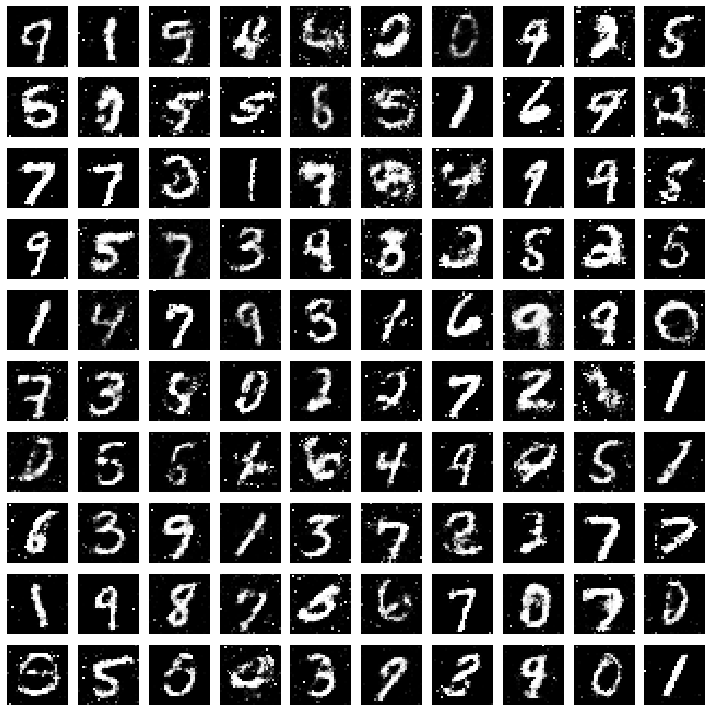

Epochs 37 D loss 156.0449 G loss 228.6101
Epochs 38 D loss 155.8135 G loss 230.1807
Epochs 39 D loss 155.4450 G loss 229.8444
Epochs 40 D loss 155.7626 G loss 228.3378
Epochs 41 D loss 155.7290 G loss 230.2265


<Figure size 432x288 with 0 Axes>

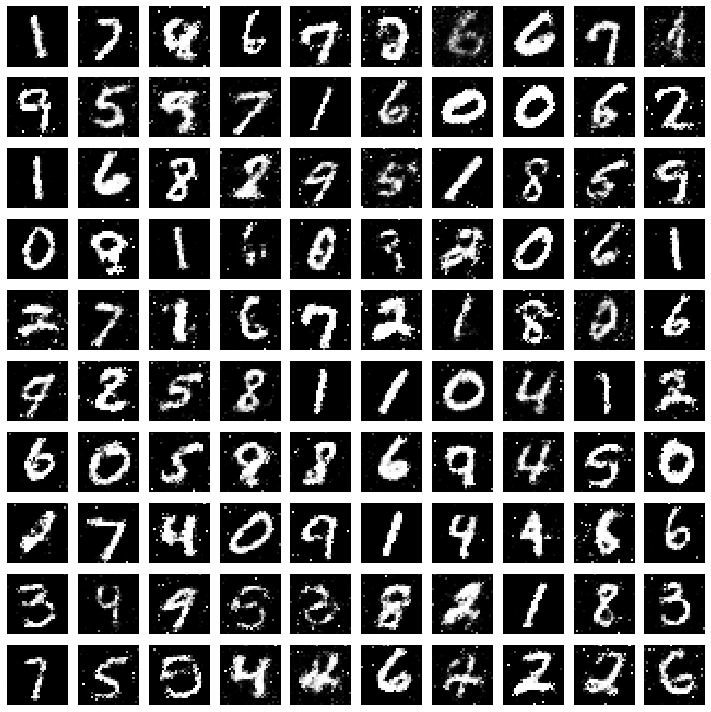

Epochs 42 D loss 155.8282 G loss 229.2479
Epochs 43 D loss 155.6902 G loss 230.1839
Epochs 44 D loss 155.5613 G loss 229.6876
Epochs 45 D loss 155.9285 G loss 229.4195
Epochs 46 D loss 155.9705 G loss 229.3998


<Figure size 432x288 with 0 Axes>

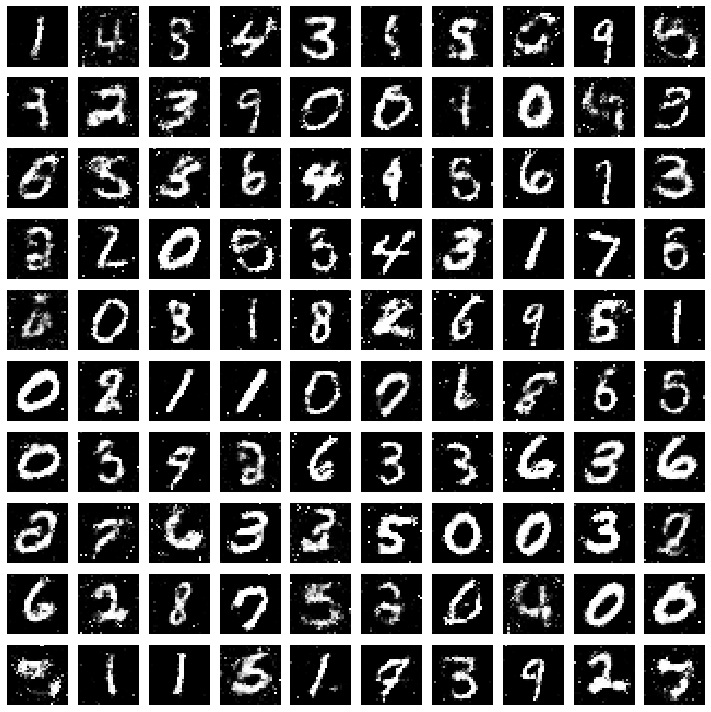

Epochs 47 D loss 156.0480 G loss 229.0504
Epochs 48 D loss 156.2099 G loss 228.2945
Epochs 49 D loss 156.2376 G loss 227.8035
Epochs 50 D loss 156.1777 G loss 228.2030
Epochs 51 D loss 156.2903 G loss 228.6728


<Figure size 432x288 with 0 Axes>

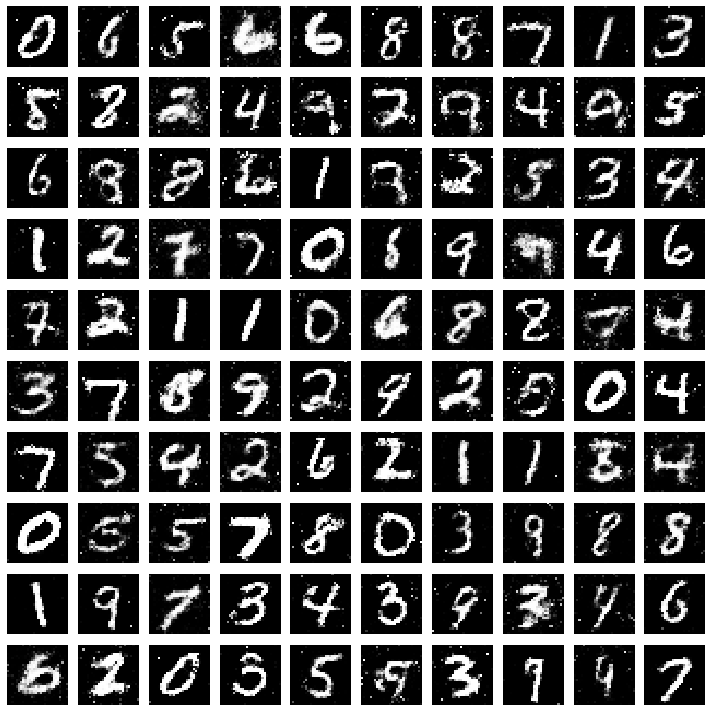

Epochs 52 D loss 155.9223 G loss 227.1519
Epochs 53 D loss 156.3160 G loss 228.8095
Epochs 54 D loss 156.4278 G loss 228.6812
Epochs 55 D loss 156.6007 G loss 228.1926
Epochs 56 D loss 156.6019 G loss 229.2919


<Figure size 432x288 with 0 Axes>

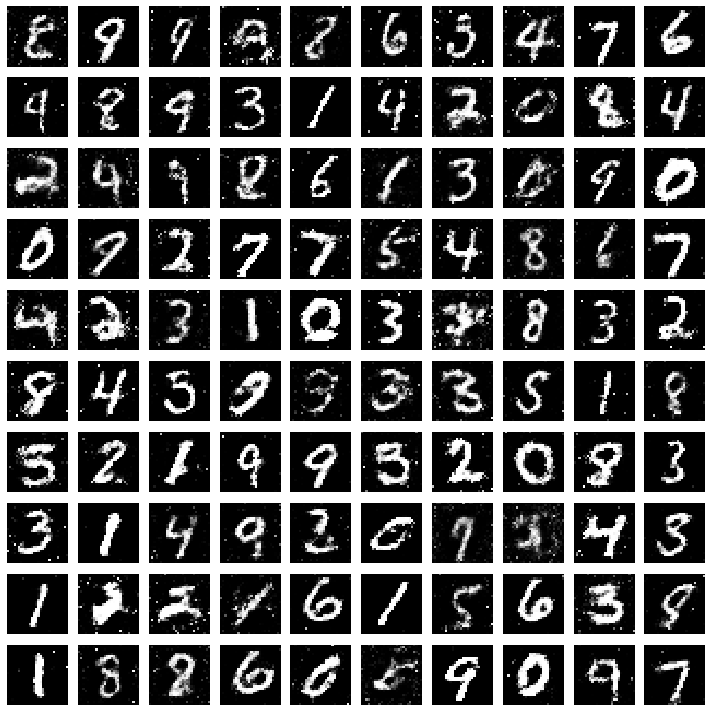

Epochs 57 D loss 156.6966 G loss 227.6407
Epochs 58 D loss 156.6008 G loss 227.7873
Epochs 59 D loss 156.4543 G loss 228.2320
Epochs 60 D loss 156.5820 G loss 228.4963
Epochs 61 D loss 156.5944 G loss 228.4195


<Figure size 432x288 with 0 Axes>

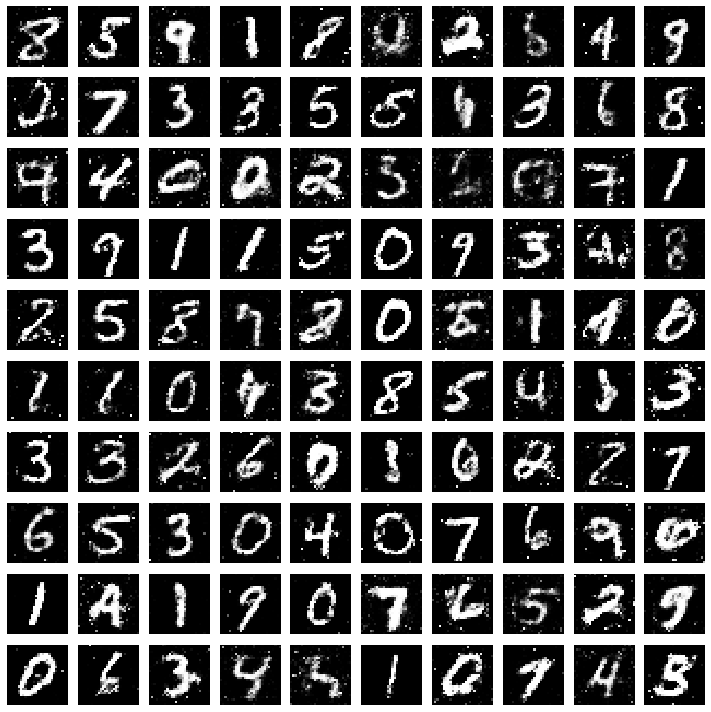

Epochs 62 D loss 156.4377 G loss 229.4282
Epochs 63 D loss 156.6597 G loss 227.7921
Epochs 64 D loss 156.6021 G loss 226.6494
Epochs 65 D loss 156.9608 G loss 227.4676
Epochs 66 D loss 156.6111 G loss 228.4294


<Figure size 432x288 with 0 Axes>

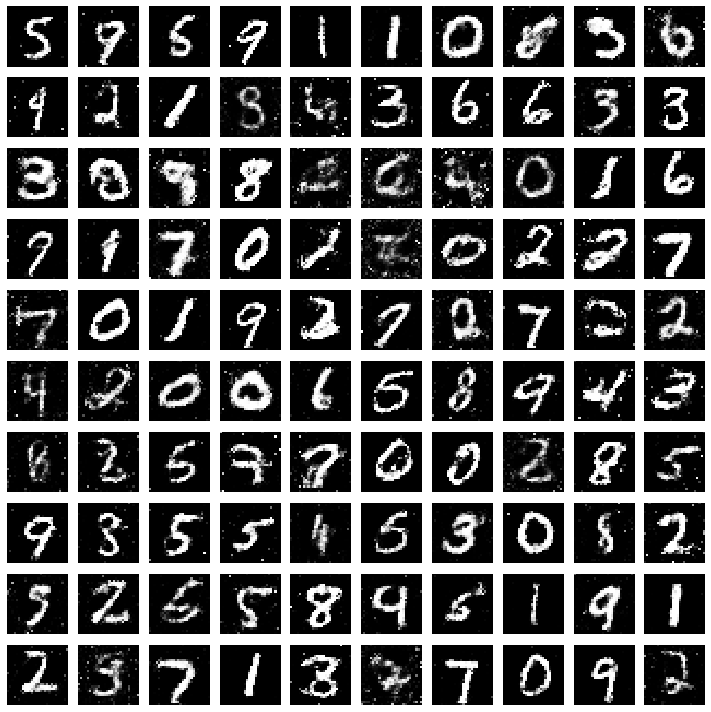

Epochs 67 D loss 156.9092 G loss 226.1181
Epochs 68 D loss 156.4416 G loss 227.9176
Epochs 69 D loss 156.3923 G loss 227.9499
Epochs 70 D loss 156.7639 G loss 227.3388
Epochs 71 D loss 156.4170 G loss 228.1569


<Figure size 432x288 with 0 Axes>

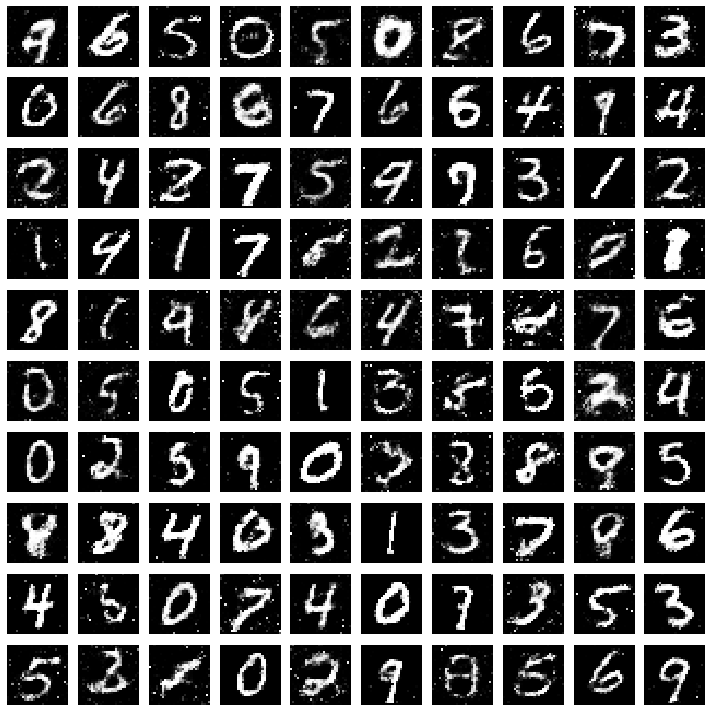

Epochs 72 D loss 156.7512 G loss 227.6663
Epochs 73 D loss 156.5686 G loss 229.4422
Epochs 74 D loss 156.4468 G loss 228.1479
Epochs 75 D loss 156.6443 G loss 226.8894
Epochs 76 D loss 156.3911 G loss 227.9290


<Figure size 432x288 with 0 Axes>

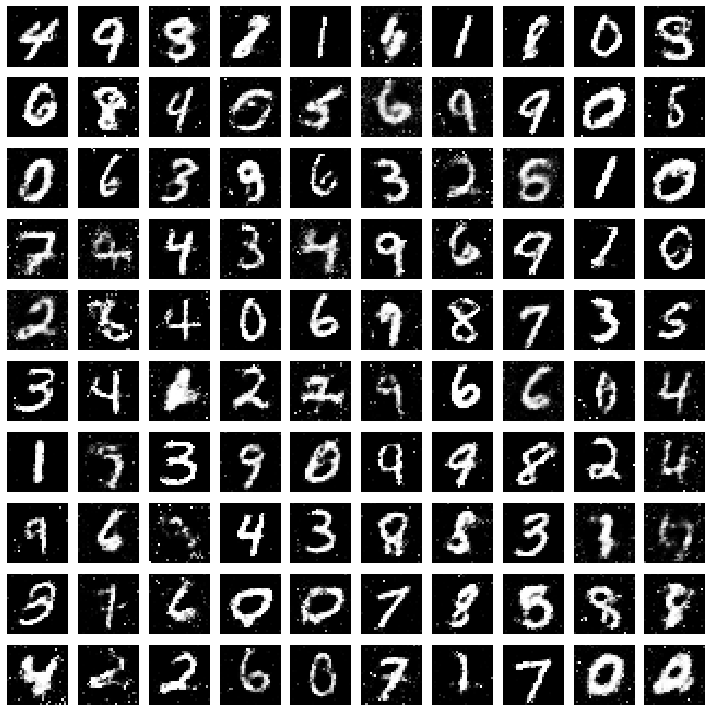

Epochs 77 D loss 156.6544 G loss 227.2488
Epochs 78 D loss 156.3704 G loss 229.0653
Epochs 79 D loss 156.6538 G loss 228.4485
Epochs 80 D loss 156.2984 G loss 227.3868
Epochs 81 D loss 156.2708 G loss 228.5147


<Figure size 432x288 with 0 Axes>

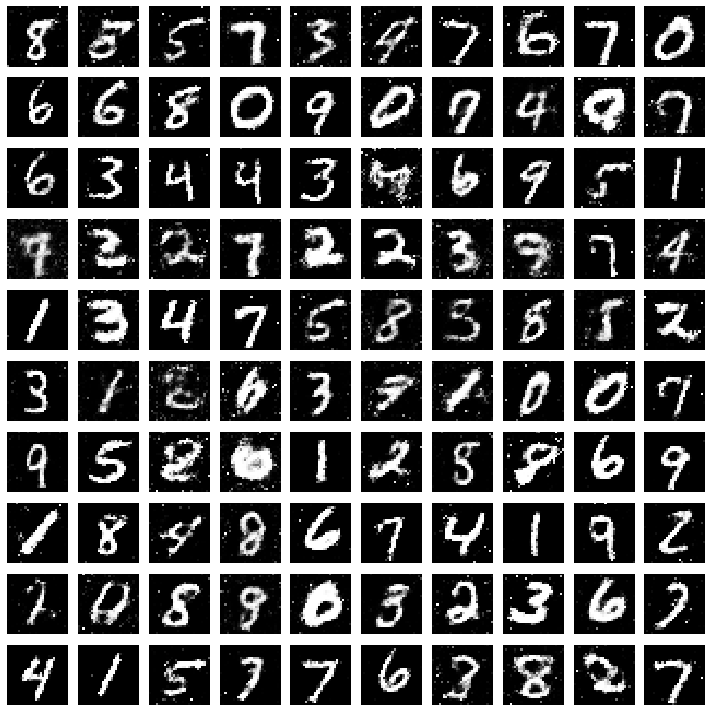

Epochs 82 D loss 156.4549 G loss 228.6059
Epochs 83 D loss 156.2848 G loss 227.8378
Epochs 84 D loss 156.4652 G loss 227.6434
Epochs 85 D loss 156.5732 G loss 229.1993
Epochs 86 D loss 156.1996 G loss 228.2270


<Figure size 432x288 with 0 Axes>

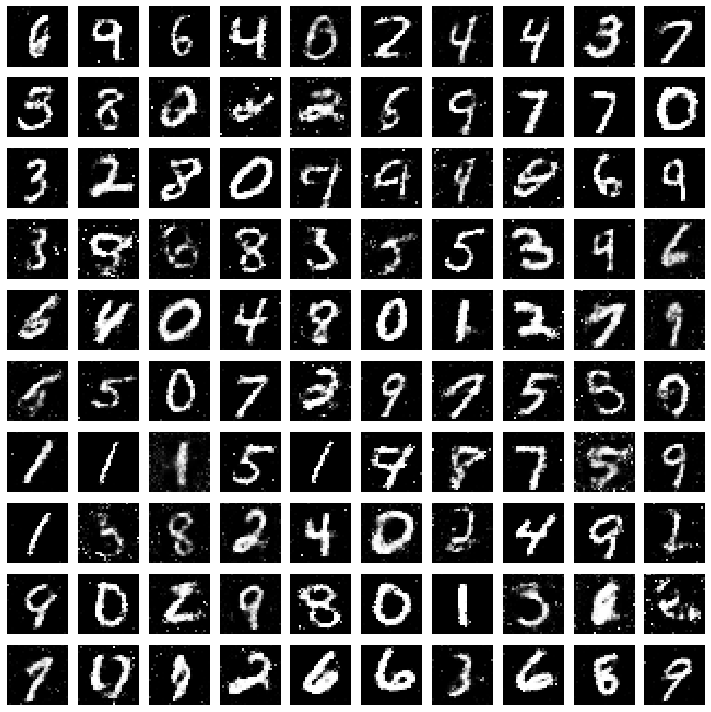

Epochs 87 D loss 156.1225 G loss 228.3135
Epochs 88 D loss 156.2301 G loss 229.0218
Epochs 89 D loss 156.1240 G loss 227.9095
Epochs 90 D loss 156.3268 G loss 227.9913
Epochs 91 D loss 156.0809 G loss 229.3086


<Figure size 432x288 with 0 Axes>

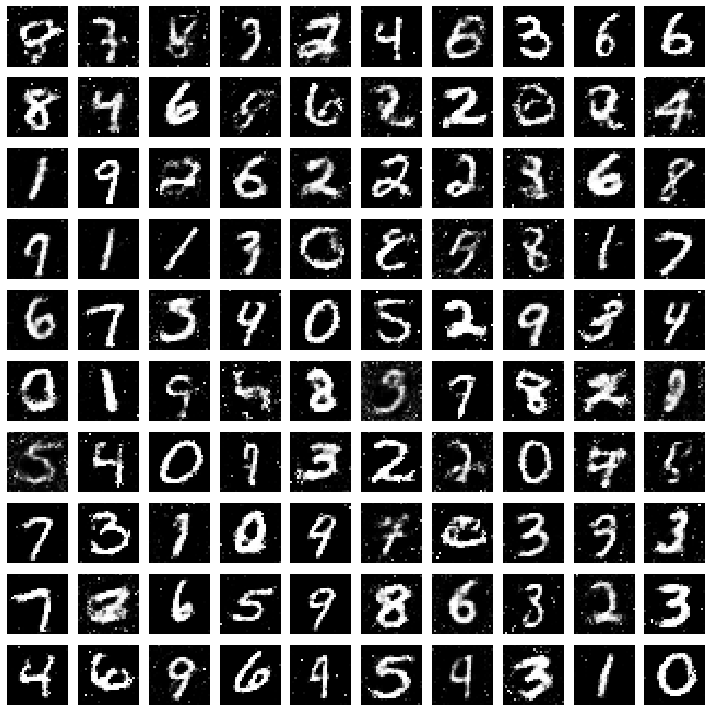

Epochs 92 D loss 156.2448 G loss 228.6651
Epochs 93 D loss 156.0547 G loss 228.1591
Epochs 94 D loss 156.0868 G loss 228.0505
Epochs 95 D loss 155.9690 G loss 229.8276
Epochs 96 D loss 155.8433 G loss 229.2270


<Figure size 432x288 with 0 Axes>

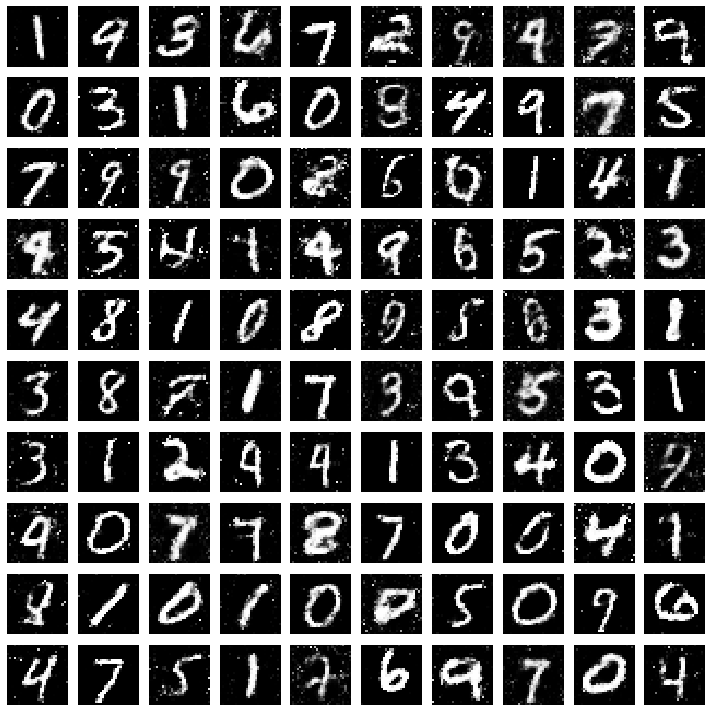

Epochs 97 D loss 155.9555 G loss 229.5920
Epochs 98 D loss 155.6347 G loss 229.1755
Epochs 99 D loss 155.8447 G loss 228.6663
Epochs 100 D loss 155.5544 G loss 229.3796


<Figure size 432x288 with 0 Axes>

In [21]:
g_losses = []
d_losses = []

### training loop
for epoch in range(EPOCHS):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  
  # Mini Batch
  for step in range(NO_OF_BATCHES):
    idx = np.random.randint(0, X_Train.shape[0], HALF_BATCH_SIZE)
    real_imgs = X_Train[idx]
    
    # generate fake image assuming generator is frozen
    noise = np.random.normal(0, 1, size=(HALF_BATCH_SIZE, NOISE_DIM))
    fake_imgs = generator.predict(noise)
    
    # lables
    real_y = np.ones((HALF_BATCH_SIZE, 1))*0.9
    fake_y = np.zeros((HALF_BATCH_SIZE, 1))
    
    # Train on Real and Fake Images
    d_real_loss = discriminator.train_on_batch(real_imgs, real_y)
    d_fake_loss = discriminator.train_on_batch(fake_imgs, fake_y)
    
    d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
    epoch_d_loss += d_loss
    
    
    # Train Generator
    noise = np.random.normal(0, 1, size = (BATCH_SIZE, NOISE_DIM))
    real_y = np.ones((BATCH_SIZE, 1))
    g_loss = model.train_on_batch(noise,real_y)
    
    epoch_g_loss += g_loss
 

  print('Epochs %d D loss %.4f G loss %.4f'%(epoch + 1, epoch_d_loss, epoch_g_loss))
  if (epoch%5) == 0:
    generator.save('models/gen_{0}.h5'.format(epoch))
    showImage(epoch)